In [1]:
import numpy as np
from matplotlib import pylab as plt
import scipy.signal as sc
from IPython.display import Audio, display
%matplotlib inline

In [2]:
def computeLowpassIR(n, Fc, Fs):
    return 2.*Fc/Fs*np.sinc(2.*Fc/Fs*n)

In [3]:
def iirLowPass(Fc, Fs):
    omega = 2.*np.pi*Fc/Fs

    K=np.tan(omega/2.)
    Q=1./np.sqrt(2.)
    
    b = np.zeros(3)
    a = np.zeros(3)
    
    b[0] =  K**2
    b[1] =  2*K**2
    b[2] =  K**2
    a[0] =  1 + K/Q + K**2
    a[1] =  2*(K**2 - 1)
    a[2] =  1 - K/Q + K**2
    return b, a

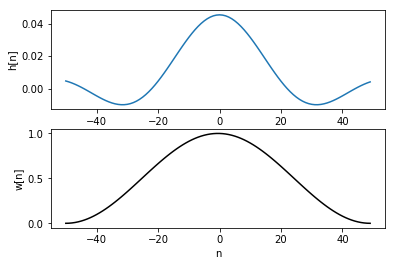

In [4]:
#==========================
# Play with these!
Fc = 1000.
Fs = 44100.
N_SAMPLES = 100
#==========================

n = np.linspace(-N_SAMPLES/2, N_SAMPLES/2 - 1, num=N_SAMPLES)

# compute the low pass impulse response
ir = computeLowpassIR(n, Fc, Fs)

# plot the non causal impulse response and a hanning window of the same length
plt.subplot(211)
plt.plot(n, ir)
plt.ylabel('h[n]')
plt.subplot(212)
plt.plot(n, np.hanning(len(ir)), '-k')
plt.xlabel('n')
plt.ylabel('w[n]')

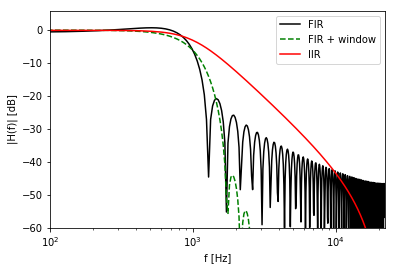

In [5]:
# Plot the frequency response of the realized low pass, with and without the windowing
w, h = sc.freqz(ir) #non windowed version
_, hWin = sc.freqz(ir * np.hanning(len(ir)))#windowed version
plt.semilogx(Fs/2*w/np.pi, 20*np.log10(np.abs(h)), '-k')
plt.semilogx(Fs/2*w/np.pi, 20*np.log10(np.abs(hWin)), '--g')

# Plot the according IIR filter
b, a = iirLowPass(Fc, Fs)
w, h = sc.freqz(b, a) #non windowed version
plt.semilogx(Fs/2*w/np.pi, 20*np.log10(np.abs(h)), '-r')

plt.xlim([100, Fs/2])
plt.ylim([-60, 6])
plt.xlabel('f [Hz]')
plt.ylabel('|H(f)| [dB]')
plt.legend(['FIR', 'FIR + window', 'IIR'])

In [ ]:
# Plot the pole and zero plots for all filters here!